# Análise exploratória dos Microdados do ENADE

## Alunos:
    - Berly Joaquin
    - Leonardo Lopes

## Objetivos

O objetivo deste trabalho é analisar a série histórica do perfil dos participantes que realizaram a prova do ENADE. O foco será nas informações econômicas, como renda e outros fatores econômicos.

## Bibliotecas Utilizadas

Para a análise feita neste trabalho, utilizamos as bibliotecas **Pandas**, **Numpy** e **Matplotlib** da linguagem Python

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Preparando os dados

Na etapa da preparação dos dados, foi necessário tratar as informações obtidas nas bases de dados fornecidas.

### Tipos de Informações

* **Ano**: representa ano em que o exame foi realizado e está disponível na base de dados na coluna `nu_ano` sem maior necessidade de tratamentos de dados;
* **Idade**: análoga à informação de ano, está disponível na base de dados de forma amigável na coluna `nu_idade` e não foi necessário tratar estes dados;
* **Renda**: representa a renda da família em número de salários mínimos (independente do ano do exame), foi o tipo de dado que apresentou maiores dificuldades no seu tratamento, uma vez que a informação aparece com diferetes nomes de colunas na base de dados original e seus valores categórios não nos trazem grandes informações de forma imediata. Para tal, transformamos o a informação categórica em dados numéricos (a categoria foi mapeada para seu valor médio)

In [3]:
def clean_data(dataframe, renda, bolsa, dict_renda=None):
    new_dataframe = pd.DataFrame(columns=['ano', 'idade'])
    new_dataframe['ano'] = dataframe['nu_ano']
    new_dataframe['idade'] = dataframe['nu_idade']
    new_dataframe['bolsa'] = dataframe[bolsa].str.lower()
    
    if dict_renda is None:
        dict_renda = { 'a': 1.5, 'b': 2.25, 'c': 3.75, 'd': 5.25, 'e': 8.0, 'f': 15.0, 'g': 30.0 }
    
    r = dataframe[renda].str.lower()
    
    new_dataframe['renda'] = r.map(dict_renda)
    

    return new_dataframe

In [ ]:
### Obtendo os dados

Os dados da base de dados foram obtidos a partir do arquivo .csv de cada ano

In [4]:
dict_renda_2011 = { 'b': 1.5, 'c': 2.25, 'd': 3.75, 'e': 5.25, 'f': 8.0, 'g': 15.0, 'h': 30.0 }

df10 = clean_data(pd.read_csv('microdados_enade_2010.csv', encoding='latin1', delimiter=';'), 'QE_I5', 'QE_I10')
df11 = clean_data(pd.read_csv('microdados_enade_2011.csv', encoding='latin1', delimiter=';'), 'co_rs_s5','co_rs_s10', dict_renda_2011)
df12 = clean_data(pd.read_csv('microdados_enade_2012.csv' ,encoding='latin1', delimiter=';'), 'qe_i5', 'qe_i10')
df13 = clean_data(pd.read_csv('microdados_enade_2013.csv', delimiter=';'), 'co_rs_s7', 'co_rs_s10' )
df14 = clean_data(pd.read_csv('microdados_enade_2014.csv', delimiter=';', low_memory=False),  'qe_i8', 'qe_i11')

dfs = [df10, df11, df12, df13, df14]

In [11]:
df = pd.DataFrame()

df = df.append(dfs)

df.describe()

,ano,idade,renda
count,2.065002e+06,2.065002e+06,1.623011e+06
mean,2.011970e+03,2.886043e+01,7.189929e+00
std,1.424391e+00,8.199503e+00,7.126464e+00
min,2.010000e+03,1.400000e+01,1.500000e+00
25%,2.011000e+03,2.300000e+01,2.250000e+00
50%,2.012000e+03,2.600000e+01,5.250000e+00
75%,2.013000e+03,3.300000e+01,8.000000e+00
max,2.014000e+03,1.000000e+02,3.000000e+01


In [8]:
df.renda.unique()

array([ 15.  ,   3.75,   8.  ,    nan,  30.  ,   5.25,   1.5 ,   2.25])

### Visualizando a Distribuição dos Dados

Para melhorar a visualização dos dados, montamos um bloxplot com os dados da renda dos candidatos do ENADE.

Analisando os últimos 5 anos da base, foi possível notar que no ano de 2012 houve um pico nos dados de renda e seus valores estao acima dos dados dos outros anos.

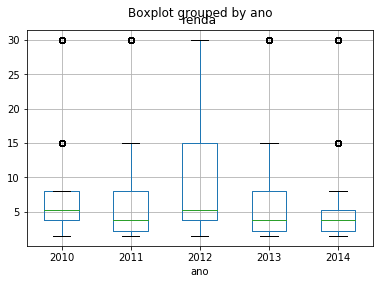

In [9]:
%matplotlib inline
df.boxplot(column='renda', by='ano')

Além disso, montamos um histogrma-para a visualização destes dados de outra forma:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f45df7435c0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f45e3e76dd8>]], dtype=object)

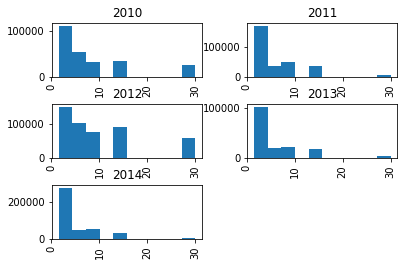

In [10]:
%matplotlib inline
df['renda'].hist(by=df['ano'])